![NYC Skyline](assets/nyc.jpg)

Welcome to New York City, one of the most-visited cities in the world. There are many Airbnb listings in New York City to meet the high demand for temporary lodging for travelers, which can be anywhere between a few nights to many months. **In this project, we will take a closer look at the New York Airbnb market by combining data from multiple file types like `.csv`, `.tsv`, and `.xlsx`**.

Recall that **CSV**, **TSV**, and **Excel** files are three common formats for storing data. 
Three files containing data on 2019 Airbnb listings are available to you:

**data/airbnb_price.csv**
This is a CSV file containing data on Airbnb listing prices and locations.
- **`listing_id`**: unique identifier of listing
- **`price`**: nightly listing price in USD
- **`nbhood_full`**: name of borough and neighborhood where listing is located

**data/airbnb_room_type.xlsx**
This is an Excel file containing data on Airbnb listing descriptions and room types.
- **`listing_id`**: unique identifier of listing
- **`description`**: listing description
- **`room_type`**: Airbnb has three types of rooms: shared rooms, private rooms, and entire homes/apartments

**data/airbnb_last_review.tsv**
This is a TSV file containing data on Airbnb host names and review dates.
- **`listing_id`**: unique identifier of listing
- **`host_name`**: name of listing host
- **`last_review`**: date when the listing was last reviewed

As a consultant working for a real estate start-up, you have collected Airbnb listing data from various sources to investigate the short-term rental market in New York. You'll analyze this data to provide insights on private rooms to the real estate company.

There are three files in the **`data`** folder: **`airbnb_price.csv`**, **`airbnb_room_type.xlsx`**, **`airbnb_last_review.tsv`**.

- What are the dates of the earliest and most recent reviews? Store these values as two separate variables with your preferred names.
- How many of the listings are private rooms? Save this into any variable.
- What is the average listing price? Round to the nearest penny and save into a variable.
- Combine the new variables into one DataFrame called **`review_dates`** with four columns in the following order: **`first_reviewed`**, **`last_reviewed`**, **`nb_private_rooms`**, and **`avg_price`**. The DataFrame should only contain one row of values.

In [1]:
# Import libraries
import numpy as np
import pandas as pd

In [2]:
# Import CSV for prices
airbnb_price = pd.read_csv("data/airbnb_price.csv")
# Import Excel file for room types
airbnb_room_type = pd.read_excel("data/airbnb_room_type.xlsx")
# Import TSV file for reviews
airbnb_last_reviews = pd.read_csv("data/airbnb_last_review.tsv", sep="\t")

# Joining the dataframes into one
#listings = airbnb_price.join(airbnb_room_type, on="listing_id", how="inner").join(airbnb_last_reviews, on="listing_id", how="inner")
listings = pd.merge(airbnb_price, airbnb_room_type, on="listing_id") # by default inner join
listings = pd.merge(listings, airbnb_last_reviews, on="listing_id")

listings

,listing_id,price,nbhood_full,description,room_type,host_name,last_review
0,2595,225 dollars,"Manhattan, Midtown",Skylit Midtown Castle,Entire home/apt,Jennifer,May 21 2019
1,3831,89 dollars,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,Entire home/apt,LisaRoxanne,July 05 2019
2,5099,200 dollars,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,Entire home/apt,Chris,June 22 2019
3,5178,79 dollars,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,private room,Shunichi,June 24 2019
4,5238,150 dollars,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,Entire home/apt,Ben,June 09 2019
...,...,...,...,...,...,...,...
25204,36425863,129 dollars,"Manhattan, Upper East Side",Lovely Privet Bedroom with Privet Restroom,PRIVATE ROOM,Rusaa,July 07 2019
25205,36427429,45 dollars,"Queens, Flushing",No.2 with queen size bed,PRIVATE ROOM,H Ai,July 07 2019
25206,36438336,235 dollars,"Staten Island, Great Kills",Seas The Moment,Private room,Ben,July 07 2019
25207,36442252,100 dollars,"Bronx, Mott Haven",1B-1B apartment near by Metro,Entire home/apt,Blaine,July 07 2019


In [3]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   price        25209 non-null  object
 2   nbhood_full  25209 non-null  object
 3   description  25199 non-null  object
 4   room_type    25209 non-null  object
 5   host_name    25201 non-null  object
 6   last_review  25209 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


In [4]:
# Price, room type and last review columns
# We can check the price and date format columns
listings[["price", "room_type", "last_review"]].head()

,price,room_type,last_review
0,225 dollars,Entire home/apt,May 21 2019
1,89 dollars,Entire home/apt,July 05 2019
2,200 dollars,Entire home/apt,June 22 2019
3,79 dollars,private room,June 24 2019
4,150 dollars,Entire home/apt,June 09 2019


In [5]:
# Room type options
# We need to make some modifications
listings["room_type"].value_counts()

room_type
Entire home/apt    8458
Private room       7241
entire home/apt    2665
private room       2248
ENTIRE HOME/APT    2143
PRIVATE ROOM       1867
Shared room         380
shared room         110
SHARED ROOM          97
Name: count, dtype: int64

In [6]:
# 1. Dates of the earliest and most recent reviews

# We need to convert the "last_review" column to datetime to be able to use functions like min()/max()
listings["last_review"] = pd.to_datetime(listings["last_review"], format='%B %d %Y')
first_reviewed = listings["last_review"].min()
last_reviewed = listings["last_review"].max()

print(f"Dates for firt reviewed: {first_reviewed},\nand last reviewed: {last_reviewed}")

Dates for firt reviewed: 2019-01-01 00:00:00,
and last reviewed: 2019-07-09 00:00:00


In [7]:
# 2. Number of private room listings

# We need to make some modifications since there are differences in capitalization
listings["room_type"] = listings["room_type"].str.lower()
private_room_count = listings["room_type"].value_counts().iloc[0]
#private_room_count = listings[listings["room_type"] == "private room"].shape[0]

print(f"The number of private rooms is: {private_room_count}")

The number of private rooms is: 13266


In [8]:
# 3. Average listings price

# We need to convert the price column to float type
listings["price"] = listings["price"].str.replace(" dollars", "").astype("float")
avg_price = listings["price"].mean()

print(f"The average listing price is: {round(avg_price, 2)}$")

The average listing price is: 141.78$


In [9]:
# 4. Combine answers into one dataframe
review_dates = pd.DataFrame({
    "first_reviewed": [first_reviewed],
    "last_reviewed": [last_reviewed],
    "nb_private_rooms": [private_room_count],
    "avg_price": [round(avg_price, 2)]
})

print(review_dates)

  first_reviewed last_reviewed  nb_private_rooms  avg_price
0     2019-01-01    2019-07-09             13266     141.78


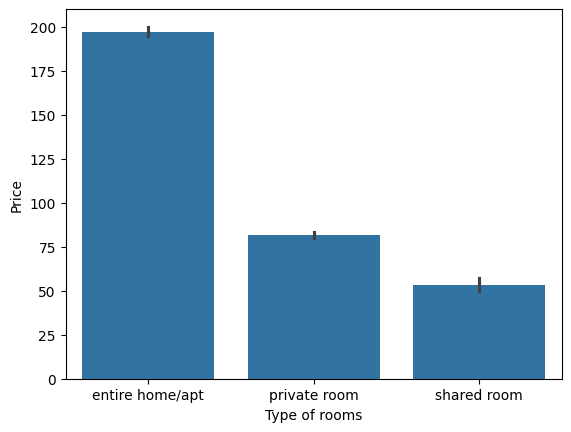

In [10]:
# Extra: check how prices depend on the room type
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
ax = sns.barplot(listings, x="room_type", y="price", ax=ax)
ax.set(xlabel="Type of rooms", ylabel="Price")
plt.show()